In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import Counter
import seaborn as sns

In [2]:
df = pd.read_csv('Loan_Default.csv')
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

# Data Visualizing

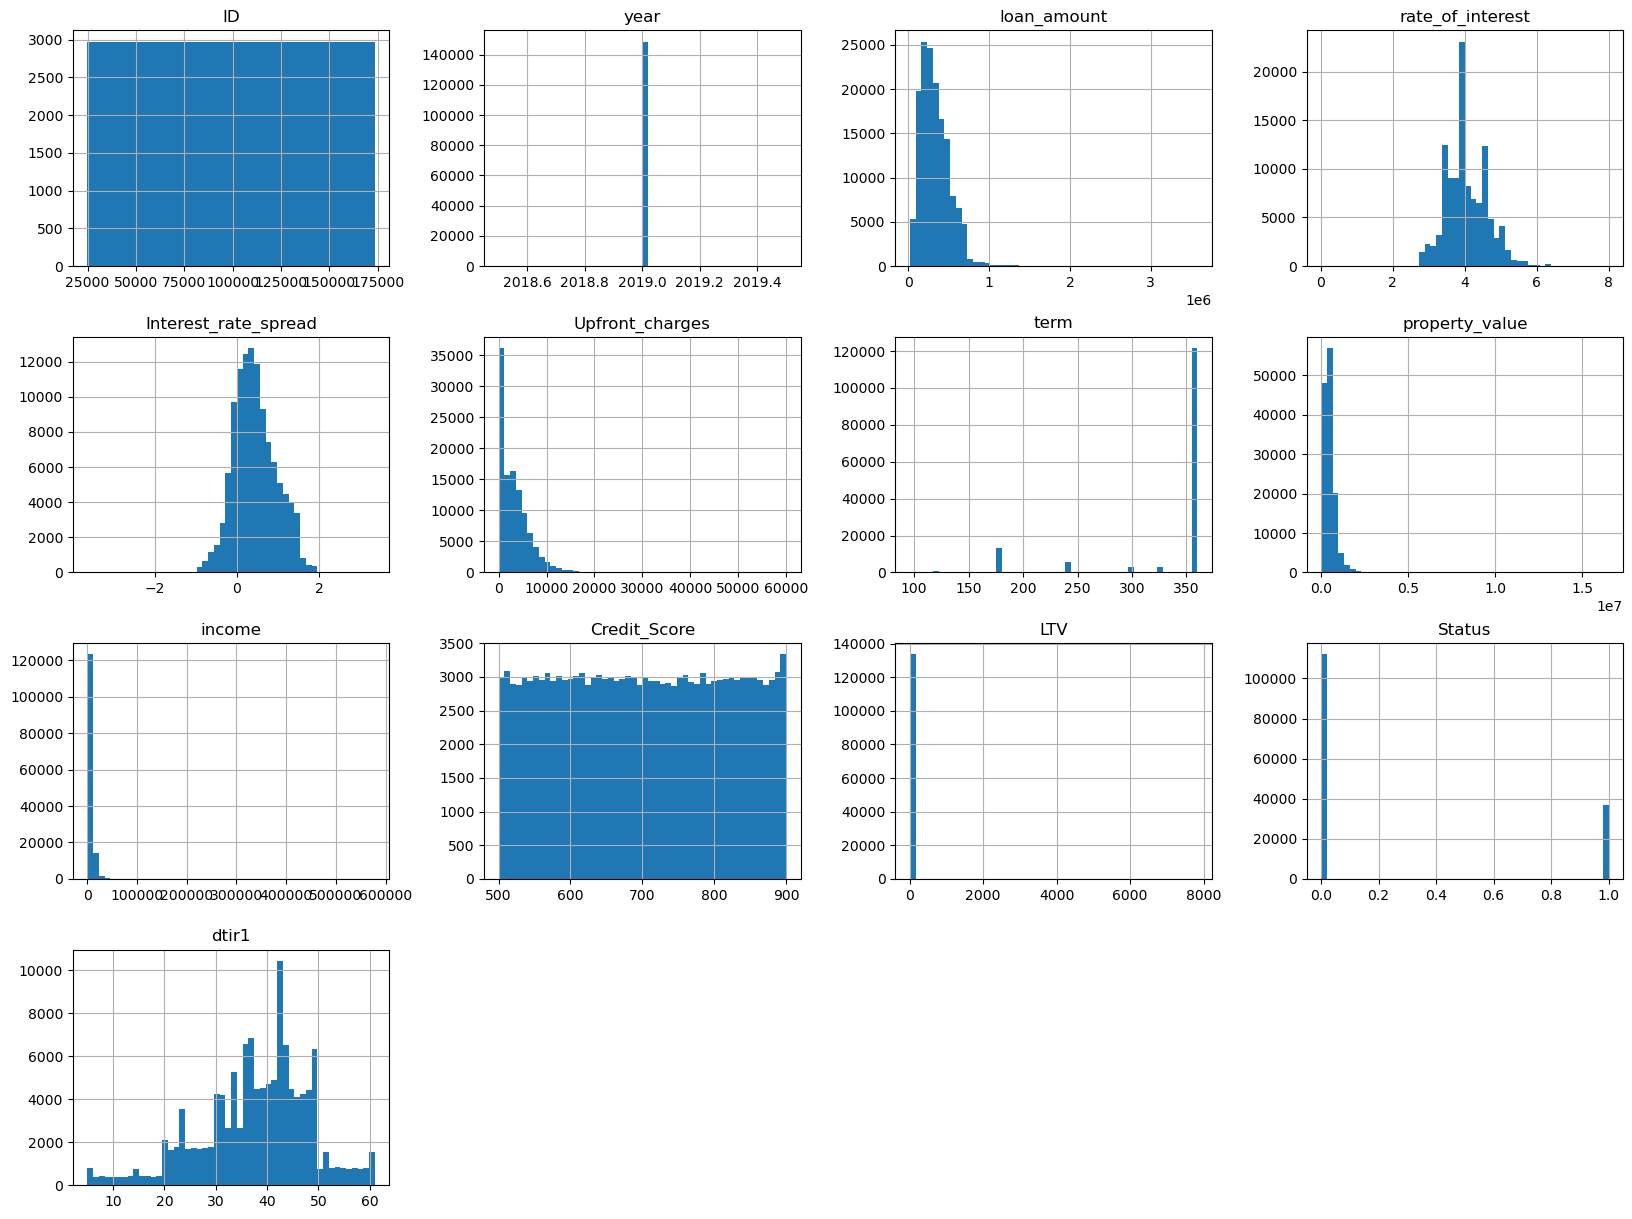

In [4]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

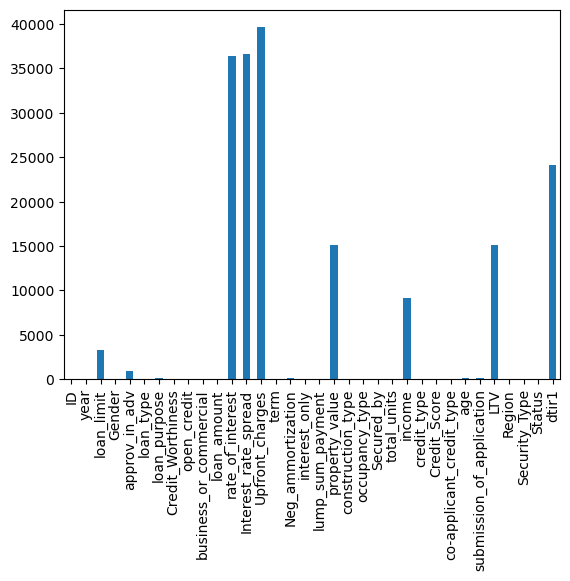

In [5]:
df.isna().sum().plot.bar()
plt.show()


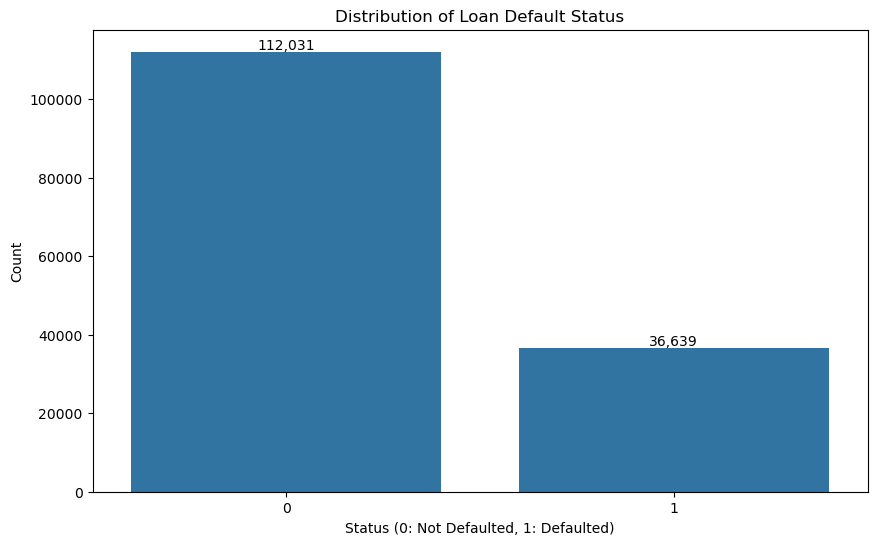

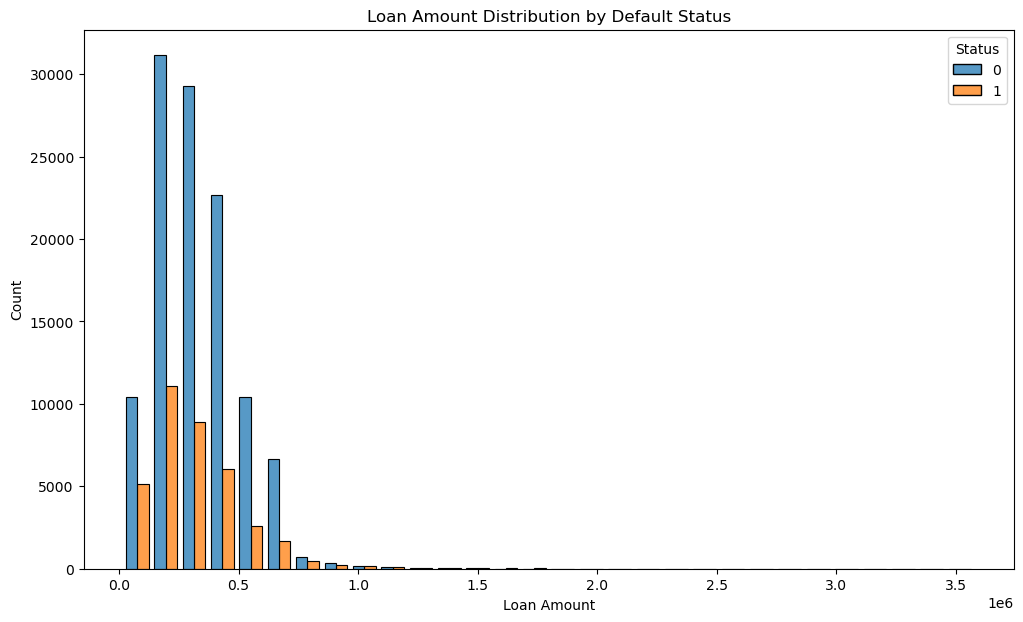

<Figure size 1400x800 with 0 Axes>

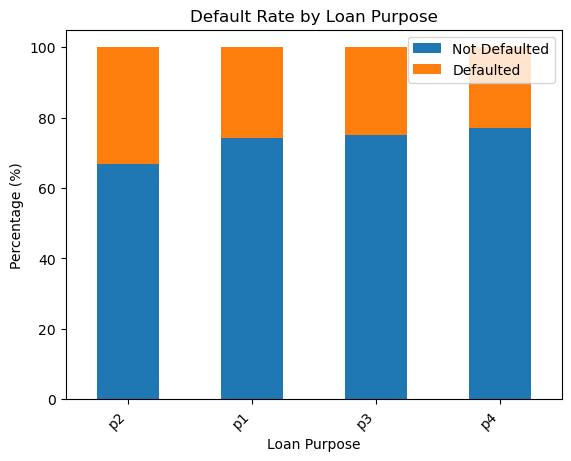

<Figure size 1200x700 with 0 Axes>

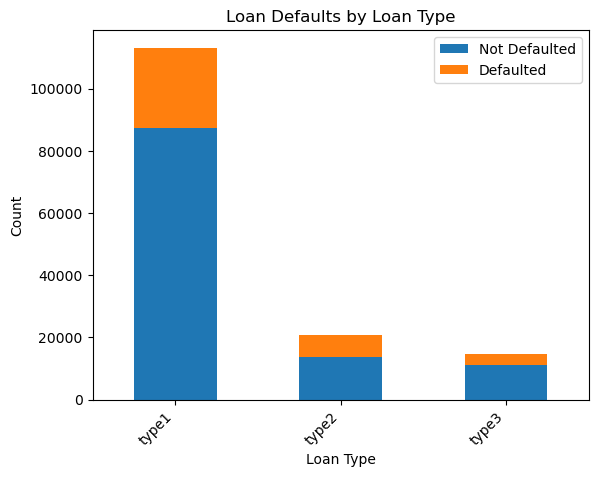

<Figure size 1500x1000 with 0 Axes>

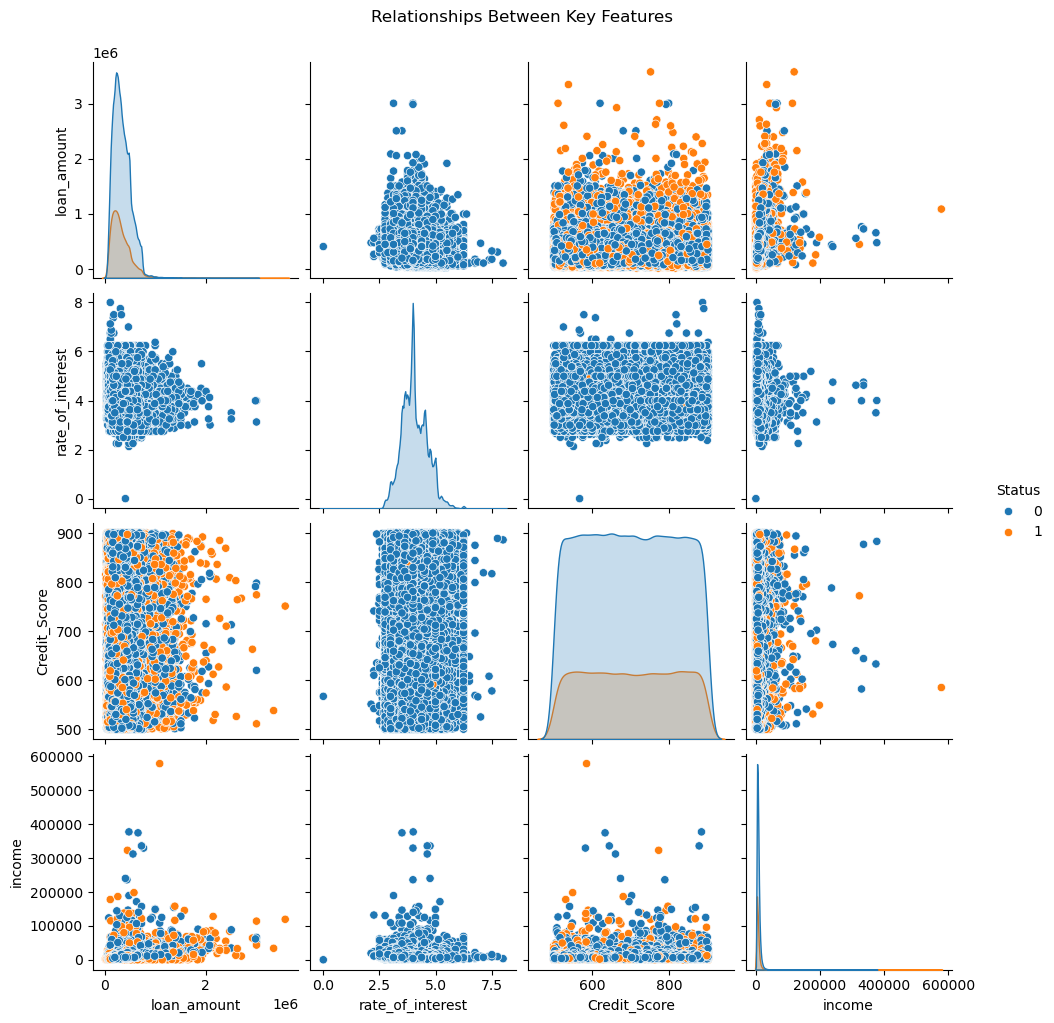

<Figure size 1400x800 with 0 Axes>

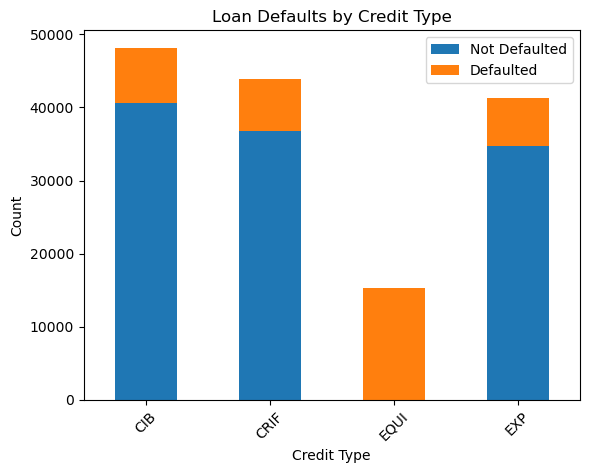

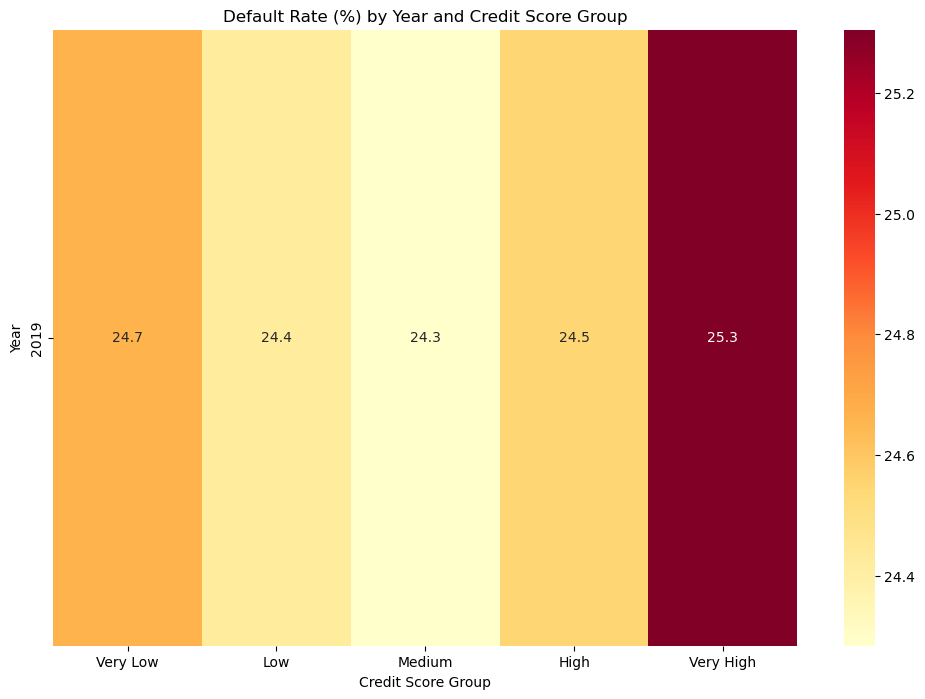

In [6]:
# Display the distribution of the target variable (Status)
plt.figure(figsize=(10, 6))
status_counts = df['Status'].value_counts().sort_index()
ax = sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Distribution of Loan Default Status')
plt.xlabel('Status (0: Not Defaulted, 1: Defaulted)')
plt.ylabel('Count')
for i, v in enumerate(status_counts.values):
    ax.text(i, v + 500, f'{v:,}', ha='center')
plt.show()


# Loan amount distribution by default status
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='loan_amount', hue='Status', multiple='dodge', bins=30, shrink=0.8)
plt.title('Loan Amount Distribution by Default Status')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()


# Loan Purpose Analysis
plt.figure(figsize=(14, 8))
purpose_default = pd.crosstab(df['loan_purpose'], df['Status'], normalize='index') * 100
purpose_default.sort_values(by=1, ascending=False).plot(kind='bar', stacked=True)
plt.title('Default Rate by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Percentage (%)')
plt.legend(['Not Defaulted', 'Defaulted'])
plt.xticks(rotation=45, ha='right')
plt.show()

# Loan Type Analysis
plt.figure(figsize=(12, 7))
type_counts = pd.crosstab(df['loan_type'], df['Status'])
type_counts.plot(kind='bar', stacked=True)
plt.title('Loan Defaults by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.legend(['Not Defaulted', 'Defaulted'])
plt.xticks(rotation=45, ha='right')
plt.show()

# Pairplot of key numerical features
key_features = ['loan_amount', 'rate_of_interest', 'Credit_Score', 'income', 'Status']
plt.figure(figsize=(15, 10))
sns.pairplot(df[key_features], hue='Status', diag_kind='kde')
plt.suptitle('Relationships Between Key Features', y=1.02)
plt.show()

# Credit type vs Default Status
plt.figure(figsize=(14, 8))
credit_default = pd.crosstab(df['credit_type'], df['Status'])
credit_default.plot(kind='bar', stacked=True)
plt.title('Loan Defaults by Credit Type')
plt.xlabel('Credit Type')
plt.ylabel('Count')
plt.legend(['Not Defaulted', 'Defaulted'])
plt.xticks(rotation=45)
plt.show()

# Heatmap of default rates by year and credit score groups
# First create credit score groups
df['credit_score_group'] = pd.cut(df['Credit_Score'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
default_by_year_score = pd.crosstab([df['year'], df['credit_score_group']], df['Status'], normalize='index')[1] * 100
default_matrix = default_by_year_score.unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(default_matrix, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Default Rate (%) by Year and Credit Score Group')
plt.ylabel('Year')
plt.xlabel('Credit Score Group')
plt.show()

df.drop('credit_score_group', axis=1, inplace=True)

# Data Cleaning and processing

In [4]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [5]:
# filling missing values

cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['number']).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna("Unknown")
    df[col] = df[col].astype(str)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              148670 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148670 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

In [7]:
# finding continuous float columns to put in bins 

continuous_cols = []

for col in df.select_dtypes(include=['float64']).columns:  
    unique_values = df[col].nunique()
    
    if unique_values > 10:  
        continuous_cols.append(col)

continuous_cols

['rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'LTV',
 'dtir1']

In [8]:
for col in continuous_cols:
    df[col] = pd.qcut(df[col], q=5, labels=False, duplicates='drop')
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,4,south,direct,1,3
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,2,North,direct,1,2
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,3,south,direct,0,4
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,1,North,direct,0,3
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,4,North,direct,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,1,south,direct,0,4
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,2,south,direct,0,0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,1,North,direct,0,4
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,1,North,direct,0,0


In [9]:
continuous_cols = []
    
for col in df.select_dtypes(include=['number']).columns:
    unique_values = df[col].nunique()
        
    if unique_values > 10:
        continuous_cols.append(col)
    
continuous_cols

['ID', 'loan_amount', 'Credit_Score']

In [ ]:
# we dont want id
del continuous_cols[0]


for col in continuous_cols:
    df[col] = pd.qcut(df[col], q=5, labels=False,duplicates='drop')  

    
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,3,CIB,25-34,to_inst,4,south,direct,1,3
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,0,EXP,55-64,to_inst,2,North,direct,1,2
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,4,CIB,35-44,to_inst,3,south,direct,0,4
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,1,CIB,45-54,not_inst,1,North,direct,0,3
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,1,EXP,25-34,not_inst,4,North,direct,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,1,EXP,55-64,to_inst,1,south,direct,0,4
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,0,CIB,25-34,not_inst,2,south,direct,0,0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,2,EXP,45-54,not_inst,1,North,direct,0,4
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,2,EXP,55-64,to_inst,1,North,direct,0,0


In [11]:
# turn categorical columns into numerical

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype(str)

label_encoders = {}
for col in categorical_cols:
    unique_values = df[col].unique()
    value_to_label = {val: idx for idx, val in enumerate(unique_values)}
    
    label_encoders[col] = {
        'mapping': value_to_label,
        'inverse_mapping': {idx: val for val, idx in value_to_label.items()}
    }
    
    df[col] = df[col].map(value_to_label)

df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,0,0,0,0,0,0,0,0,...,0,3,0,0,0,4,0,0,1,3
1,24891,2019,0,1,0,1,0,0,0,1,...,1,0,1,1,0,2,1,0,1,2
2,24892,2019,0,1,1,0,0,0,0,0,...,0,4,0,2,0,3,0,0,0,4
3,24893,2019,0,1,0,0,1,0,0,0,...,0,1,0,3,1,1,1,0,0,3
4,24894,2019,0,2,1,0,0,0,0,0,...,2,1,1,0,1,4,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,0,0,0,0,2,0,0,0,...,3,1,1,1,0,1,0,0,0,4
148666,173556,2019,0,1,0,0,0,0,0,0,...,3,0,0,0,1,2,0,0,0,0
148667,173557,2019,0,1,0,0,1,0,0,0,...,3,2,1,3,1,1,1,0,0,4
148668,173558,2019,0,3,0,0,1,0,0,0,...,0,2,1,1,0,1,1,0,0,0


In [12]:
df = df.drop_duplicates()

# drop not effective columns
# also drop the columns that makes the model biased
# df = df.drop(columns=["ID", "Gender", "age", "Region"])
df = df.drop(columns=["ID", "Gender"])

df

,year,loan_limit,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,2019,0,0,0,0,0,0,0,0,1,...,0,3,0,0,0,4,0,0,1,3
1,2019,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,2,1,0,1,2
2,2019,0,1,0,0,0,0,0,3,3,...,0,4,0,2,0,3,0,0,0,4
3,2019,0,0,0,1,0,0,0,3,2,...,0,1,0,3,1,1,1,0,0,3
4,2019,0,1,0,0,0,0,0,4,2,...,2,1,1,0,1,4,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,2019,0,0,0,2,0,0,0,3,0,...,3,1,1,1,0,1,0,0,0,4
148666,2019,0,0,0,0,0,0,0,4,3,...,3,0,0,0,1,2,0,0,0,0
148667,2019,0,0,0,1,0,0,0,3,0,...,3,2,1,3,1,1,1,0,0,4
148668,2019,0,0,0,1,0,0,0,1,0,...,0,2,1,1,0,1,1,0,0,0


In [13]:
df['Status'].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

# Model Classes


In [ ]:
class Node:
    def __init__(self, feature=None, threshold=None, children=None, value=None, impurity=None, info_gain=None):
        self.feature = feature
        self.threshold = threshold
        self.children = children if children else {}
        # children = {
        #     0: Node(value=1, impurity=0, info_gain=0),  # Leaf node for Feature 1 = 0
        #     1: Node(value=0, impurity=0, info_gain=0)   # Leaf node for Feature 1 = 1
        # }   
        self.value = value
        self.impurity = impurity
        self.info_gain = info_gain 

    def is_leaf(self):
        return self.value is not None

In [15]:
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='gini', max_features=None, random_state=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.criterion = criterion
        self.max_features = max_features
        self.random_state = random_state
        self.root = None
        self.n_features = None
        self.feature_names = None
        
    def gini_entropy(self, y):
        if len(y) == 0:
            return 0
            
        counts = Counter(y)
        probabilities = [count / len(y) for count in counts.values()]
        
        if self.criterion == 'gini':
            impurity = 1 - sum(p**2 for p in probabilities)
        else:  # entropy
            impurity = -sum(p * np.log2(p) for p in probabilities if p > 0)
            
        return impurity
    
    def info_gain(self, y, splits):
        parent_impurity = self.gini_entropy(y)
        n = len(y)

        if any(len(split) == 0 for split in splits):
            return 0

        weighted_impurity = sum((len(split) / n) * self.gini_entropy(split) for split in splits)

        return parent_impurity - weighted_impurity

    
    def get_best_feature(self, X, y):
        n_samples, n_features = X.shape
        
        if n_samples < self.min_samples_split:
            return None, None, None

        best_gain = -np.inf
        best_feature = None
        best_splits = None  

        feature_indices = np.random.choice(
            n_features, 
            self.max_features or n_features, 
            replace=False
        )

        for feature in feature_indices:
            feats = np.unique(X[:, feature])
            
            subsets = {}
            for val in feats:
                mask = X[:, feature] == val
                subset_X = X[mask]
                subset_y = y[mask]
                subsets[val] = (subset_X, subset_y)

            if len(subsets) < 2:
                continue
                
            empty_subsets = True
            for _, (_, subset_y) in subsets.items():
                if len(subset_y) > 0:
                    empty_subsets = False
                    break
                    
            if empty_subsets:
                continue


            subset_y_list = [subset_y for _, (_, subset_y) in subsets.items()]
            gain = self.info_gain(y, subset_y_list)

            if gain > best_gain:
                best_gain = gain
                best_feature = feature
                best_splits = subsets

        if best_feature is not None:
            return best_feature, best_splits, best_gain
        else:
            return None, None, None


    def build_tree(self, X, y, depth=0):
        # stopping: max depth reached or pure node
        if self.max_depth is not None and depth >= self.max_depth:
            most_common_value = Counter(y).most_common(1)[0][0]
            return Node(
                value=most_common_value, 
                impurity=self.gini_entropy(y), 
                info_gain=0
            )
        
        if len(np.unique(y)) == 1:
            return Node(
                value=y[0], 
                impurity=0, 
                info_gain=0
            )

        best_feature, best_splits, best_gain = self.get_best_feature(X, y)

        if best_feature is None:
            most_common_value = Counter(y).most_common(1)[0][0]
            return Node(
                value=most_common_value, 
                impurity=self.gini_entropy(y), 
                info_gain=0
            )

        children = {}
        for val, (sub_X, sub_y) in best_splits.items():
            child_node = self.build_tree(sub_X, sub_y, depth + 1)
            children[val] = child_node

        return Node(
            feature=best_feature, 
            children=children, 
            impurity=self.gini_entropy(y), 
            info_gain=best_gain
        )
    

    def train(self, X, y):
        # if i dont put this, i get a error in the learning curve
        if isinstance(X, pd.DataFrame):
            self.feature_names = X.columns.tolist()
            X = X.values
        
        if isinstance(y, pd.Series):
            y = y.values
            
        if self.random_state is not None:
            np.random.seed(self.random_state)
            
        self.n_features = X.shape[1]
        self.root = self.build_tree(X, y)
        return self
    
    
    def get_most_common_child_value(self, node):
        child_values = []
        for child in node.children.values():
            if child.value is not None:
                child_values.append(child.value)

        if not child_values:
            return 0  

        return Counter(child_values).most_common(1)[0][0]
    
    def _predict(self, x, node):
        if node.is_leaf():
            return node.value

        feature_value = x[node.feature]

        if feature_value in node.children:
            return self._predict(x, node.children[feature_value])
        else:
            # Handle the case where we don't have a branch for this feature value
            # by returning the most common class among the children
            most_common_value = self.get_most_common_child_value(node)
            return most_common_value


    def predict(self, X):
        return np.array([self._predict(x, self.root) for x in X])
    
    def prune(self, X_val, y_val):
        if isinstance(X_val, pd.DataFrame):
            X_val = X_val.values
        
        if isinstance(y_val, pd.Series):
            y_val = y_val.values
        
        initial_accuracy = np.mean(self.predict(X_val) == y_val)
        
        def _prune(node, X_val, y_val):
            if node.is_leaf():
                return False
            
            original_children = node.children.copy()
            original_value = node.value
            
            if len(y_val) > 0:
                counter = Counter(y_val)
                most_common = counter.most_common(1)
                most_common_value = most_common[0][0]
            else:
                most_common_value = 0
            
            node.children = {}
            node.value = most_common_value
            

            predictions = self.predict(X_val)
            correct_predictions = predictions == y_val
            pruned_accuracy = np.mean(correct_predictions)
            
            if pruned_accuracy < initial_accuracy:
                node.children = original_children
                node.value = original_value
                pruned = False
            else:
                pruned = True
            
            if not pruned:
                child_pruned = False
                
                node_children_items = list(node.children.items())
                
                for value, child in node_children_items:
                    mask = X_val[:, node.feature] == value
                    
                    if sum(mask) > 0:
                        child_was_pruned = _prune(child, X_val[mask], y_val[mask])
                        
                        if child_was_pruned:
                            child_pruned = True
                            
                return child_pruned
            
            return True
        
        _prune(self.root, X_val, y_val)
        return self
    

    # Below codes are so that the DecisionTree class can be used
    # with scikit-learn's learning curve plotting
    def fit(self, X, y):
        self.train(X, y)
        return self

    
    def get_params(self, deep=True):
        return {
            'max_depth': self.max_depth,
            'min_samples_split': self.min_samples_split,
            'min_samples_leaf': self.min_samples_leaf,
            'criterion': self.criterion,
            'max_features': self.max_features,
            'random_state': self.random_state
        }

# Training Model

## Hyperparameter Tuning

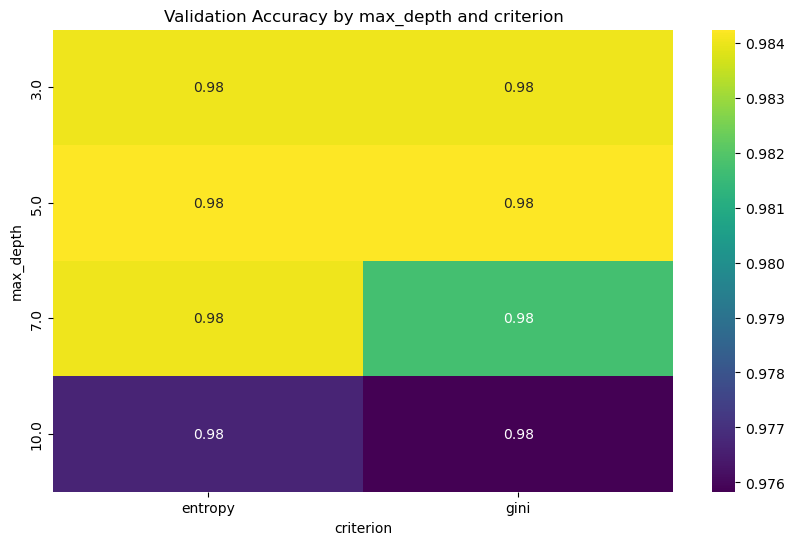

    max_depth  min_samples_split  min_samples_leaf criterion  accuracy
32        5.0                 10                 2      gini  0.984237
28        5.0                  5                 4      gini  0.984237
26        5.0                  5                 2      gini  0.984237
25        5.0                  5                 1   entropy  0.984237
24        5.0                  5                 1      gini  0.984237
23        5.0                  2                 4   entropy  0.984237
22        5.0                  2                 4      gini  0.984237
21        5.0                  2                 2   entropy  0.984237
20        5.0                  2                 2      gini  0.984237
19        5.0                  2                 1   entropy  0.984237


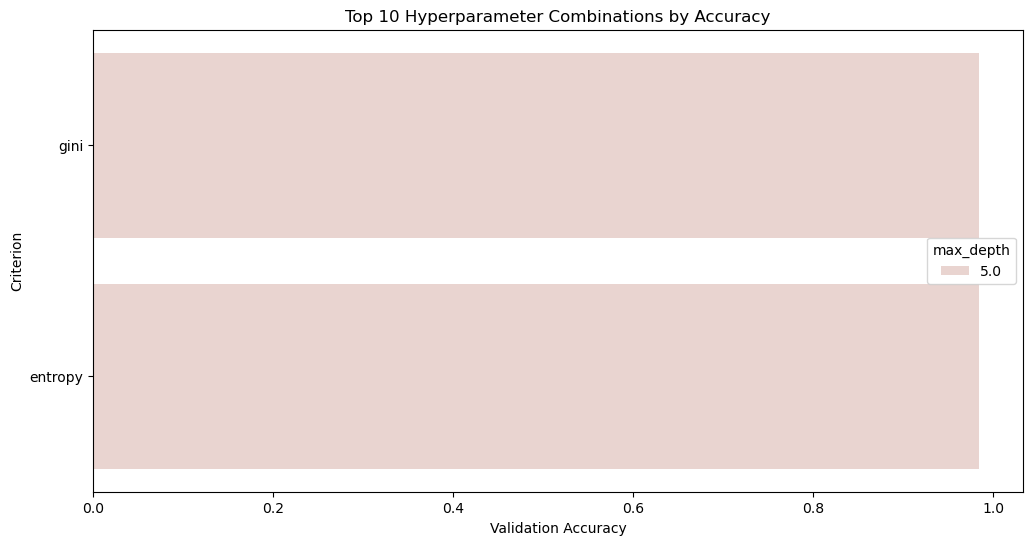

In [29]:
from sklearn.metrics import accuracy_score
from itertools import product
from sklearn.model_selection import train_test_split


df = df.sample(frac=1, random_state=101).reset_index(drop=True)
split_index = int(len(df) * 0.8)
train_df = df[:split_index]
test_df = df[split_index:]
train_sample = train_df.sample(frac=0.2, random_state=101)

train_X, val_X, train_y, val_y = train_test_split(
    train_sample.drop(columns=['Status']), train_sample['Status'], test_size=0.2, random_state=101
)


hyperparameter_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


results = []
keys, values = zip(*hyperparameter_grid.items())

for combination in product(*values):
    params = dict(zip(keys, combination))
    
    model = DecisionTree(
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        criterion=params['criterion'],
        random_state=42
    )
    
    model.train(train_X, train_y)
    

    val_predictions = model.predict(val_X.values)
    score = accuracy_score(val_y, val_predictions)
    

    results.append({
        'max_depth': params['max_depth'],
        'min_samples_split': params['min_samples_split'],
        'min_samples_leaf': params['min_samples_leaf'],
        'criterion': params['criterion'],
        'accuracy': score
    })


results_df = pd.DataFrame(results)

heatmap_data = results_df.pivot_table(
    index='max_depth', columns='criterion', values='accuracy', aggfunc='max'
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.2f')
plt.title('Validation Accuracy by max_depth and criterion')
plt.ylabel('max_depth')
plt.xlabel('criterion')
plt.show()


top_results = results_df.sort_values(by='accuracy', ascending=False).head(10)

print(top_results)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_results, x='accuracy', y='criterion', hue='max_depth', dodge=False)
plt.title('Top 10 Hyperparameter Combinations by Accuracy')
plt.xlabel('Validation Accuracy')
plt.ylabel('Criterion')
plt.legend(title='max_depth')
plt.show()

# Training on full Dataset

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
    df.drop(columns=['Status']), df['Status'], test_size=0.2, random_state=101
)

model = DecisionTree(
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=2,
        criterion='gini',
        random_state=101
    )
    
model.train(train_X, train_y)


In [17]:
train_predictions_before = model.predict(train_X.values)
train_accuracy_before = accuracy_score(train_y, train_predictions_before)
print(f"Train Accuracy before pruning: {train_accuracy_before:.4f}")

train_X_split, val_X, train_y_split, val_y = train_test_split(
    train_X, train_y, test_size=0.2, random_state=101
)

test_predictions_before = model.predict(test_X.values)
test_accuracy_before = accuracy_score(test_y, test_predictions_before)
print(f"Test Accuracy before pruning: {test_accuracy_before:.4f}")

# Uncomment to apply pruning
model.prune(val_X, val_y)
print("Model pruning complete")

# If pruning is applied, recalculate accuracies
train_predictions_after = model.predict(train_X.values)
train_accuracy_after = accuracy_score(train_y, train_predictions_after)
print(f"Train Accuracy after pruning: {train_accuracy_after:.4f}")

test_predictions_after = model.predict(test_X.values)
test_accuracy_after = accuracy_score(test_y, test_predictions_after)
print(f"Test Accuracy after pruning: {test_accuracy_after:.4f}")


test_predictions = model.predict(test_X.values)


from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(test_y, test_predictions)
print("\nConfusion Matrix:") 
print(cm)
print("\nClassification Report:")
print(classification_report(test_y, test_predictions))

Train Accuracy before pruning: 0.9831
Test Accuracy before pruning: 0.9825
Model pruning complete
Train Accuracy after pruning: 0.9822
Test Accuracy after pruning: 0.9816

Confusion Matrix:
[[21925   519]
 [   28  7262]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     22444
           1       0.93      1.00      0.96      7290

    accuracy                           0.98     29734
   macro avg       0.97      0.99      0.98     29734
weighted avg       0.98      0.98      0.98     29734



## takesway: as we saw the accuracy got lower, so we can say the model wasnt overfitting and so the accuracy dropped.

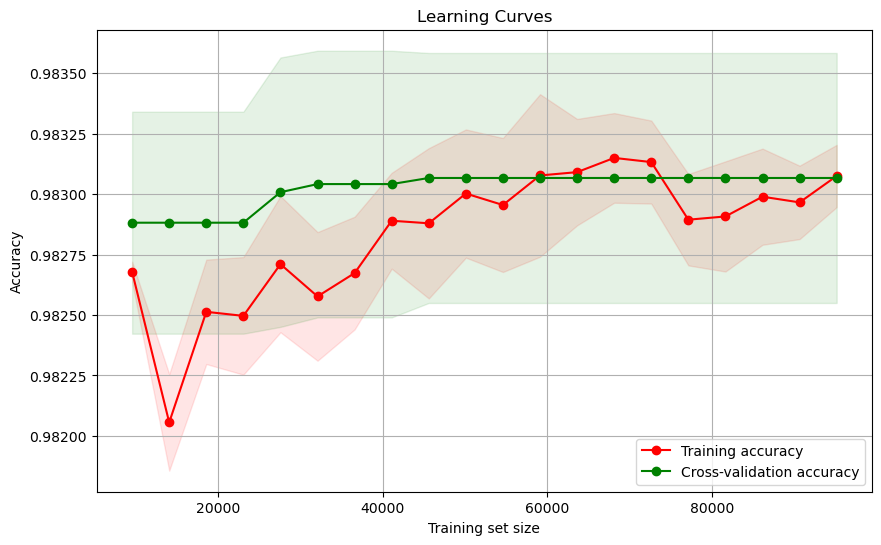

In [33]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, train_X.values, train_y, 
    cv=5, scoring='accuracy', 
    train_sizes=np.linspace(0.1, 1.0, 20)  
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()

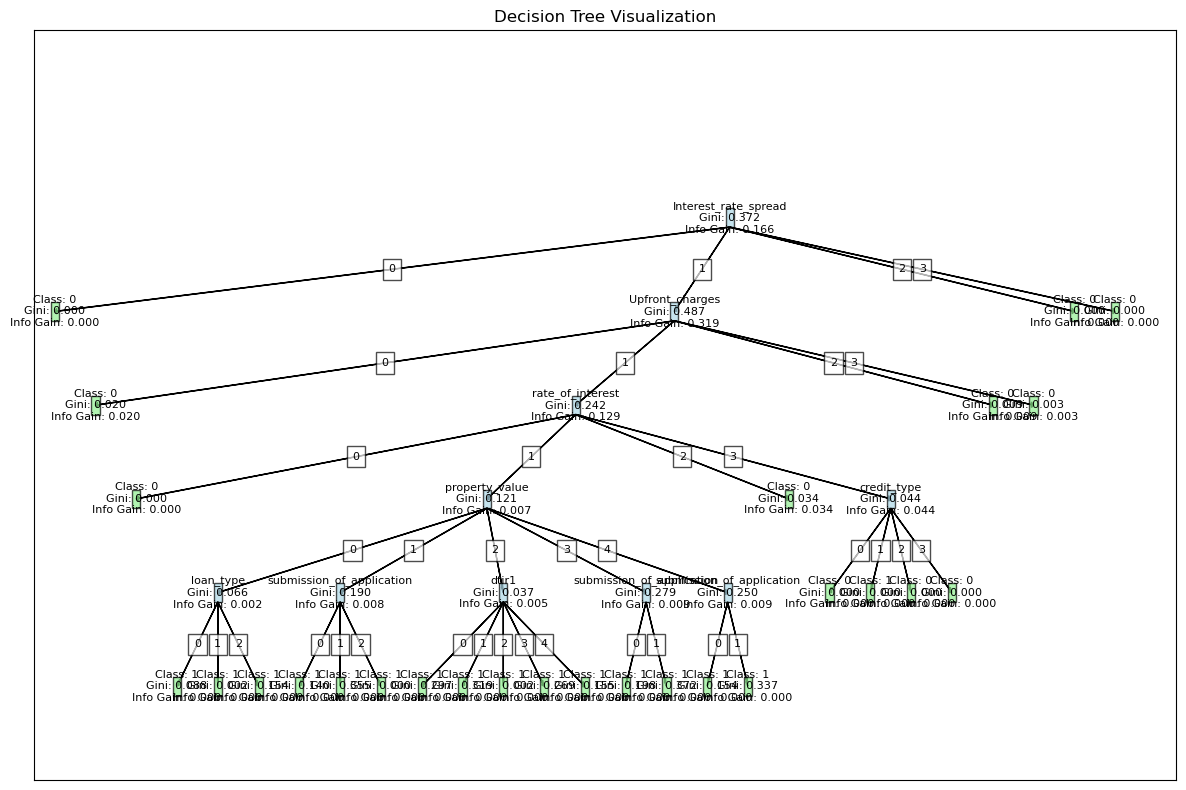

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Decision Tree Visualization'}>)

In [18]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt

def visualize_tree(tree, figsize=(12, 8)):
    fig, ax = plt.subplots(figsize=figsize)
    
    def get_tree_height(node):
        if node.is_leaf():
            return 1
        return 1 + max(get_tree_height(child) for child in node.children.values())
    
    def get_tree_width(node):
        if node.is_leaf():
            return 1
        return sum(get_tree_width(child) for child in node.children.values())
    
    tree_height = get_tree_height(tree.root)
    tree_width = get_tree_width(tree.root)
    
    node_width = 0.2
    node_height = 0.1
    h_spacing = 1.0
    v_spacing = 0.5
    
    x_positions = {}
    
    # First pass: calculate x positions
    def calculate_positions(node, level=0, x_offset=0):
        if node.is_leaf():
            x_positions[(node, level)] = x_offset
            return x_offset + 1
        
        next_x_offset = x_offset
        for val, child in node.children.items():
            next_x_offset = calculate_positions(child, level + 1, next_x_offset)
        
        # Position the parent in the middle of its children
        x_pos_children = [x_positions[(child, level + 1)] for child in node.children.values()]
        x_positions[(node, level)] = sum(x_pos_children) / len(x_pos_children)
        
        return next_x_offset
    
    calculate_positions(tree.root)
    
    # Second pass: draw the tree
    def draw_node(node, level=0):
        if (node, level) not in x_positions:
            return
            
        x = x_positions[(node, level)]
        y = tree_height - level - 1
        
        x_scaled = x * h_spacing
        y_scaled = y * v_spacing
        
        if node.is_leaf():
            node_rect = patches.Rectangle(
                (x_scaled - node_width/2, y_scaled - node_height/2),
                node_width, node_height, 
                facecolor='lightgreen', 
                edgecolor='black',
                alpha=0.7
            )
            ax.add_patch(node_rect)
            ax.text(
                x_scaled, y_scaled, 
                f"Class: {node.value}\nGini: {node.impurity:.3f}\nInfo Gain: {node.info_gain:.3f}", 
                ha='center', va='center', 
                fontsize=8
            )
        else:
            feature_name = tree.feature_names[node.feature] if tree.feature_names else f"Feature {node.feature}"
            node_rect = patches.Rectangle(
                (x_scaled - node_width/2, y_scaled - node_height/2),
                node_width, node_height, 
                facecolor='lightblue', 
                edgecolor='black',
                alpha=0.7
            )
            ax.add_patch(node_rect)
            ax.text(
                x_scaled, y_scaled, 
                f"{feature_name}\nGini: {node.impurity:.3f}\nInfo Gain: {node.info_gain:.3f}", 
                ha='center', va='center', 
                fontsize=8
            )
        
        if not node.is_leaf():
            for val, child in node.children.items():
                if (child, level + 1) not in x_positions:
                    continue
                
                child_x = x_positions[(child, level + 1)] * h_spacing
                child_y = (tree_height - (level + 1) - 1) * v_spacing
                
                ax.arrow(
                    x_scaled, y_scaled - node_height/2,
                    child_x - x_scaled, child_y - (y_scaled - node_height/2),
                    head_width=0.03, head_length=0.05, fc='black', ec='black',
                    length_includes_head=True
                )
                
                mid_x = (x_scaled + child_x) / 2
                mid_y = (y_scaled - node_height/2 + child_y) / 2
                ax.text(mid_x, mid_y, f"{val}", ha='center', va='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.7))
                
                draw_node(child, level + 1)
    
    draw_node(tree.root)
    
    ax.set_xlim(-0.5, tree_width * h_spacing + 0.5)
    ax.set_ylim(-0.5, tree_height * v_spacing + 0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Decision Tree Visualization')
    
    plt.tight_layout()
    plt.show()
    
    return fig, ax

visualize_tree(model)

In [ ]:
import graphviz

def visualize_tree_graphviz(tree):
    dot = graphviz.Digraph(
        comment='Decision Tree',
        format='pdf'
    )

    dot.attr('node', shape='box', style='filled', fontname='Arial')
    dot.attr('edge', fontname='Arial')
    dot.attr('graph', rankdir='TB')
    
    node_counter = [0]
    
    def add_node(node):
        node_id = str(node_counter[0])
        node_counter[0] += 1

        if node.is_leaf():
            # Leaf node
            label = f"Class: {node.value}\nGini: {node.impurity:.3f}\nInfo Gain: {node.info_gain:.3f}"
            dot.node(node_id, label, fillcolor='lightgreen')
        else:
            # Decision node
            feature_name = tree.feature_names[node.feature] if tree.feature_names else f"Feature {node.feature}"
            label = f"{feature_name}\nGini: {node.impurity:.3f}\nInfo Gain: {node.info_gain:.3f}"
            dot.node(node_id, label, fillcolor='lightblue')

            # Add children
            for value, child in node.children.items():
                child_id = add_node(child, node_id, value)
                dot.edge(node_id, child_id, label=str(value))

        return node_id
    
    add_node(tree.root)
    
    return dot

dot = visualize_tree_graphviz(model)
output_path = "decision_tree"  
dot.render(output_path, format="pdf", cleanup=False)
# i will get the error but it created the dot file we need

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

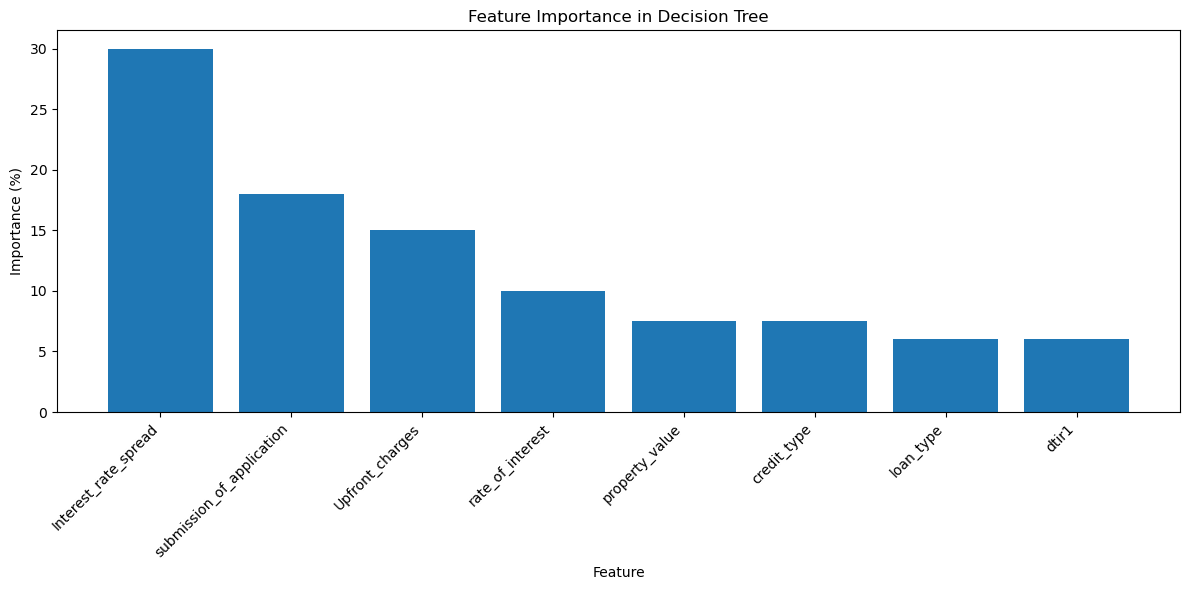

Feature Importance:
Interest_rate_spread: 30.00%
submission_of_application: 18.00%
Upfront_charges: 15.00%
rate_of_interest: 10.00%
property_value: 7.50%
credit_type: 7.50%
loan_type: 6.00%
dtir1: 6.00%


In [39]:
def extract_feature_importance(node, feature_counts=None, depth=0):
    if feature_counts is None:
        feature_counts = {}
        
    if not node.is_leaf():
        # Weight the feature by the inverse of depth to give higher importance to features used earlier
        weight = 1.0 / (depth + 1)
        feature_name = model.feature_names[node.feature] if model.feature_names else f"Feature {node.feature}"
        
        if feature_name in feature_counts:
            feature_counts[feature_name] += weight
        else:
            feature_counts[feature_name] = weight
            
        for child in node.children.values():
            extract_feature_importance(child, feature_counts, depth + 1)
            
    return feature_counts

feature_importance = extract_feature_importance(model.root)

# Normalize to sum to 100
total = sum(feature_importance.values())
normalized_importance = {k: (v / total) * 100 for k, v in feature_importance.items()}

# Sort by importance
sorted_importance = dict(sorted(normalized_importance.items(), key=lambda item: item[1], reverse=True))


plt.figure(figsize=(12, 6))
plt.bar(sorted_importance.keys(), sorted_importance.values())
plt.xlabel('Feature')
plt.ylabel('Importance (%)')
plt.title('Feature Importance in Decision Tree')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Feature Importance:")
for feature, importance in sorted_importance.items():
    print(f"{feature}: {importance:.2f}%")

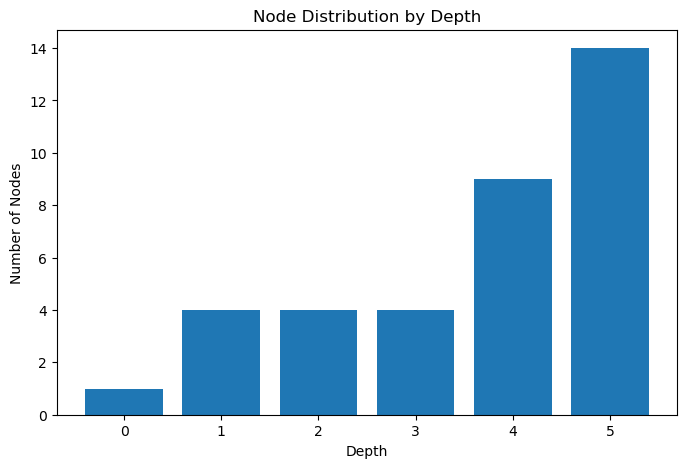

Node Distribution by Depth:
Depth 0: 1 nodes
Depth 1: 4 nodes
Depth 2: 4 nodes
Depth 3: 4 nodes
Depth 4: 9 nodes
Depth 5: 14 nodes


In [40]:
def analyze_tree_depth(node, depth=0, depth_counts=None):
    if depth_counts is None:
        depth_counts = {}
    
    if depth in depth_counts:
        depth_counts[depth] += 1
    else:
        depth_counts[depth] = 1
    
    for child in node.children.values():
        analyze_tree_depth(child, depth + 1, depth_counts)
    
    return depth_counts

# Analyze tree depth
depth_counts = analyze_tree_depth(model.root)

# Plot depth distribution
plt.figure(figsize=(8, 5))
plt.bar(depth_counts.keys(), depth_counts.values())
plt.xlabel('Depth')
plt.ylabel('Number of Nodes')
plt.title('Node Distribution by Depth')
plt.show()

print("Node Distribution by Depth:")
for depth, count in depth_counts.items():
    print(f"Depth {depth}: {count} nodes")

In [42]:
def decision_crawl(sample, node, path=None, feature_names=None):
    if path is None:
        path = []
    
    if node.is_leaf():
        path.append(f"Leaf: Predict {node.value}")
        return path
    else:
        feature_name = feature_names[node.feature] if feature_names is not None else f"Feature {node.feature}"
    
        feature_value = sample[node.feature]
        
        path.append(f"{feature_name} = {feature_value}")
        
        if feature_value in node.children:
            return decision_crawl(sample, node.children[feature_value], path, feature_names)
        else:
            path.append(f"Value {feature_value} not found in training data. Using default prediction.")
            return path

feature_names = test_X.columns if isinstance(test_X, pd.DataFrame) else None

sample_indices = [9898, 1000, 2000, 3000, 4000]


for idx in sample_indices:
    print(f"\n===== Sample #{idx} =====")
    
    sample = test_X.iloc[idx].values
    
    decision_path = decision_crawl(sample, model.root, feature_names=feature_names)
    
    print("Decision Path:")
    for step in decision_path:
        print(f"  {step}")
    
    actual = test_y.iloc[idx]
    predicted = model.predict(sample.reshape(1, -1))[0]
    
    print(f"Actual value: {actual}")
    print(f"Predicted value: {predicted}")
    print(f"Correct prediction: {'✓' if actual == predicted else '✗'}")


===== Sample #9898 =====
Decision Path:
  Interest_rate_spread = 0
  Leaf: Predict 0
Actual value: 0
Predicted value: 0
Correct prediction: ✓

===== Sample #1000 =====
Decision Path:
  Interest_rate_spread = 3
  Leaf: Predict 0
Actual value: 0
Predicted value: 0
Correct prediction: ✓

===== Sample #2000 =====
Decision Path:
  Interest_rate_spread = 1
  Upfront_charges = 1
  rate_of_interest = 1
  property_value = 3
  submission_of_application = 1
  Leaf: Predict 1
Actual value: 0
Predicted value: 1
Correct prediction: ✗

===== Sample #3000 =====
Decision Path:
  Interest_rate_spread = 0
  Leaf: Predict 0
Actual value: 0
Predicted value: 0
Correct prediction: ✓

===== Sample #4000 =====
Decision Path:
  Interest_rate_spread = 0
  Leaf: Predict 0
Actual value: 0
Predicted value: 0
Correct prediction: ✓
